In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
import numpy as np


In [38]:
dtypes = {'subspecies': str, 'order_': str, 'family': str}

In [41]:
df = pd.read_csv('C:\\Users\\kyled\\OneDrive\\Desktop\\FW_FISH_points.csv', dtype=dtypes, low_memory=False)


In [42]:
df

,objectid,id_no,sci_name,presence,origin,seasonal,compiler,yrcompiled,citation,subspecies,...,legend,kingdom,phylum,class,order_,family,genus,category,latitude,longitude
0,1831486,187245,Austrolebias viarius,1,1,1,,0,,,...,Extant (resident),ANIMALIA,CHORDATA,ACTINOPTERYGII,CYPRINODONTIFORMES,RIVULIDAE,Austrolebias,EN,-33.738611,-54.884444
1,1832701,187245,Austrolebias viarius,1,1,1,,0,,,...,Extant (resident),ANIMALIA,CHORDATA,ACTINOPTERYGII,CYPRINODONTIFORMES,RIVULIDAE,Austrolebias,EN,-34.212545,-53.775571
2,1833469,187245,Austrolebias viarius,1,1,1,,0,,,...,Extant (resident),ANIMALIA,CHORDATA,ACTINOPTERYGII,CYPRINODONTIFORMES,RIVULIDAE,Austrolebias,EN,-34.255714,-53.990227
3,1938490,182167,Enteromius trimaculatus,1,1,1,IUCN Freshwater Biodiversity Unit,2018,Denis Tweddle,,...,Extant (resident),ANIMALIA,CHORDATA,ACTINOPTERYGII,CYPRINIFORMES,CYPRINIDAE,Enteromius,LC,-15.376000,35.552000
4,1938694,182167,Enteromius trimaculatus,1,1,1,IUCN Freshwater Biodiversity Unit,2018,Denis Tweddle,,...,Extant (resident),ANIMALIA,CHORDATA,ACTINOPTERYGII,CYPRINIFORMES,CYPRINIDAE,Enteromius,LC,-9.548000,33.890000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116058,582239,191309,Floridichthys polyommus,1,1,1,J.J. Schmitter-Soto,2018,IUCN Freshwater Biodiversity Unit,,...,Extant (resident),ANIMALIA,CHORDATA,ACTINOPTERYGII,CYPRINODONTIFORMES,CYPRINODONTIDAE,Floridichthys,LC,19.370000,-90.710000
116059,678577,191244,Moxostoma austrinum,1,1,1,T. Contreras McBeath,2018,IUCN (International Union for Conservation of ...,,...,Extant (resident),ANIMALIA,CHORDATA,ACTINOPTERYGII,CYPRINIFORMES,CATOSTOMIDAE,Moxostoma,DD,20.390833,-104.501944
116060,683080,4039,Catostomus bernardini,1,1,1,T. Contreras McBeath,2018,IUCN Freshwater Biodiversity Unit,,...,Extant (resident),ANIMALIA,CHORDATA,ACTINOPTERYGII,CYPRINIFORMES,CATOSTOMIDAE,Catostomus,LC,28.916667,-109.400000
116061,686307,185972,Dormitator maculatus,1,1,1,T. Contreras McBeath,2018,IUCN Freshwater Biodiversity Unit,,...,Extant (resident),ANIMALIA,CHORDATA,ACTINOPTERYGII,GOBIIFORMES,ELEOTRIDAE,Dormitator,LC,20.171111,-96.963889


In [4]:
unique_names = df['phylum'].unique()

In [43]:
df = pd.read_csv('C:\\Users\\kyled\\OneDrive\\Desktop\\PUFFERFISH_points.csv')

In [44]:
df

,objectid,id_no,sci_name,presence,origin,seasonal,compiler,yrcompiled,citation,subspecies,...,legend,kingdom,phylum,class,order_,family,genus,category,latitude,longitude
0,6939981,162161923,Dichotomyctere nigroviridis,1,1,1,"Torres, A.G.",2020,"Quantitative Aquatics, Inc. (Q-quatics)",NaN,...,Extant (resident),ANIMALIA,CHORDATA,ACTINOPTERYGII,TETRAODONTIFORMES,TETRAODONTIDAE,Dichotomyctere,LC,8.971725,98.286684
1,6939982,162161923,Dichotomyctere nigroviridis,1,1,1,"Torres, A.G.",2020,"Quantitative Aquatics, Inc. (Q-quatics)",NaN,...,Extant (resident),ANIMALIA,CHORDATA,ACTINOPTERYGII,TETRAODONTIFORMES,TETRAODONTIDAE,Dichotomyctere,LC,8.166359,98.744806
2,6939983,162161923,Dichotomyctere nigroviridis,1,1,1,"Torres, A.G.",2020,"Quantitative Aquatics, Inc. (Q-quatics)",NaN,...,Extant (resident),ANIMALIA,CHORDATA,ACTINOPTERYGII,TETRAODONTIFORMES,TETRAODONTIDAE,Dichotomyctere,LC,2.403817,101.998369
3,6939984,162161923,Dichotomyctere nigroviridis,1,1,1,"Torres, A.G.",2020,"Quantitative Aquatics, Inc. (Q-quatics)",NaN,...,Extant (resident),ANIMALIA,CHORDATA,ACTINOPTERYGII,TETRAODONTIFORMES,TETRAODONTIDAE,Dichotomyctere,LC,1.448411,103.778986
4,6939985,162161923,Dichotomyctere nigroviridis,1,1,1,"Torres, A.G.",2020,"Quantitative Aquatics, Inc. (Q-quatics)",NaN,...,Extant (resident),ANIMALIA,CHORDATA,ACTINOPTERYGII,TETRAODONTIFORMES,TETRAODONTIDAE,Dichotomyctere,LC,1.449691,103.778885
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396,7748287,49830559,Colomesus asellus,1,1,1,Gabriel L. Brejão,2020,IUCN (International Union for Conservation of ...,NaN,...,Extant (resident),ANIMALIA,CHORDATA,ACTINOPTERYGII,TETRAODONTIFORMES,TETRAODONTIDAE,Colomesus,LC,-2.235278,-54.803611
397,7748288,49830559,Colomesus asellus,1,1,1,Gabriel L. Brejão,2020,IUCN (International Union for Conservation of ...,NaN,...,Extant (resident),ANIMALIA,CHORDATA,ACTINOPTERYGII,TETRAODONTIFORMES,TETRAODONTIDAE,Colomesus,LC,-7.659444,-72.685278
398,7748289,49830559,Colomesus asellus,1,1,1,Gabriel L. Brejão,2020,IUCN (International Union for Conservation of ...,NaN,...,Extant (resident),ANIMALIA,CHORDATA,ACTINOPTERYGII,TETRAODONTIFORMES,TETRAODONTIDAE,Colomesus,LC,-7.666667,-72.666111
399,7748290,49830559,Colomesus asellus,1,1,1,Gabriel L. Brejão,2020,IUCN (International Union for Conservation of ...,NaN,...,Extant (resident),ANIMALIA,CHORDATA,ACTINOPTERYGII,TETRAODONTIFORMES,TETRAODONTIDAE,Colomesus,LC,-4.353056,-70.228889


In [5]:
unique_names

array(['CHORDATA'], dtype=object)

In [16]:
unique_names = df['origin'].unique()

In [17]:
unique_names

array([1], dtype=int64)

In [8]:
unique_names = df['genus'].unique()

In [9]:
unique_names

array(['Dichotomyctere', 'Colomesus'], dtype=object)

In [10]:
name_counts = df['genus'].value_counts()

In [11]:
name_counts

Colomesus         340
Dichotomyctere     61
Name: genus, dtype: int64

In [47]:
df_sorted = df.sort_values('longitude')


In [48]:
df_sorted

,objectid,id_no,sci_name,presence,origin,seasonal,compiler,yrcompiled,citation,subspecies,...,legend,kingdom,phylum,class,order_,family,genus,category,latitude,longitude
232,7748123,49830559,Colomesus asellus,1,1,1,Gabriel L. Brejão,2020,IUCN (International Union for Conservation of ...,NaN,...,Extant (resident),ANIMALIA,CHORDATA,ACTINOPTERYGII,TETRAODONTIFORMES,TETRAODONTIDAE,Colomesus,LC,-0.443300,-77.068300
62,7747953,49830559,Colomesus asellus,1,1,1,Gabriel L. Brejão,2020,IUCN (International Union for Conservation of ...,NaN,...,Extant (resident),ANIMALIA,CHORDATA,ACTINOPTERYGII,TETRAODONTIFORMES,TETRAODONTIDAE,Colomesus,LC,-0.396581,-76.990176
241,7748132,49830559,Colomesus asellus,1,1,1,Gabriel L. Brejão,2020,IUCN (International Union for Conservation of ...,NaN,...,Extant (resident),ANIMALIA,CHORDATA,ACTINOPTERYGII,TETRAODONTIFORMES,TETRAODONTIDAE,Colomesus,LC,-0.463300,-76.901700
250,7748141,49830559,Colomesus asellus,1,1,1,Gabriel L. Brejão,2020,IUCN (International Union for Conservation of ...,NaN,...,Extant (resident),ANIMALIA,CHORDATA,ACTINOPTERYGII,TETRAODONTIFORMES,TETRAODONTIDAE,Colomesus,LC,-0.233300,-75.916700
246,7748137,49830559,Colomesus asellus,1,1,1,Gabriel L. Brejão,2020,IUCN (International Union for Conservation of ...,NaN,...,Extant (resident),ANIMALIA,CHORDATA,ACTINOPTERYGII,TETRAODONTIFORMES,TETRAODONTIDAE,Colomesus,LC,-0.258300,-75.891700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27,6940008,162161923,Dichotomyctere nigroviridis,1,1,1,"Torres, A.G.",2020,"Quantitative Aquatics, Inc. (Q-quatics)",NaN,...,Extant (resident),ANIMALIA,CHORDATA,ACTINOPTERYGII,TETRAODONTIFORMES,TETRAODONTIDAE,Dichotomyctere,LC,4.728600,115.077000
22,6940003,162161923,Dichotomyctere nigroviridis,1,1,1,"Torres, A.G.",2020,"Quantitative Aquatics, Inc. (Q-quatics)",NaN,...,Extant (resident),ANIMALIA,CHORDATA,ACTINOPTERYGII,TETRAODONTIFORMES,TETRAODONTIDAE,Dichotomyctere,LC,4.758300,115.091000
19,6940000,162161923,Dichotomyctere nigroviridis,1,1,1,"Torres, A.G.",2020,"Quantitative Aquatics, Inc. (Q-quatics)",NaN,...,Extant (resident),ANIMALIA,CHORDATA,ACTINOPTERYGII,TETRAODONTIFORMES,TETRAODONTIDAE,Dichotomyctere,LC,4.890600,115.118000
47,6940028,162161923,Dichotomyctere nigroviridis,1,1,1,"Torres, A.G.",2020,"Quantitative Aquatics, Inc. (Q-quatics)",NaN,...,Extant (resident),ANIMALIA,CHORDATA,ACTINOPTERYGII,TETRAODONTIFORMES,TETRAODONTIDAE,Dichotomyctere,LC,4.350000,117.533300


In [49]:
selected_rows = df[df['longitude'] > 0]['longitude']

{'whiskers': [<matplotlib.lines.Line2D at 0x29b0f3e16f0>,
 'caps': [<matplotlib.lines.Line2D at 0x29b0f3e1c30>,
 'boxes': [<matplotlib.lines.Line2D at 0x29b0f3e1570>],
 'medians': [<matplotlib.lines.Line2D at 0x29b0f3e2170>],
 'fliers': [<matplotlib.lines.Line2D at 0x29b0f3e2410>],
 'means': []}

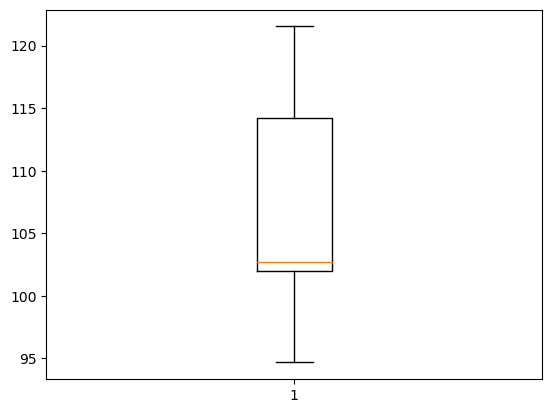

In [50]:
plt.boxplot(selected_rows)

{'whiskers': [<matplotlib.lines.Line2D at 0x29b10fb1660>,
 'caps': [<matplotlib.lines.Line2D at 0x29b10fb1ba0>,
 'boxes': [<matplotlib.lines.Line2D at 0x29b10fb13c0>],
 'medians': [<matplotlib.lines.Line2D at 0x29b10fb20e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x29b10fb2380>],
 'means': []}

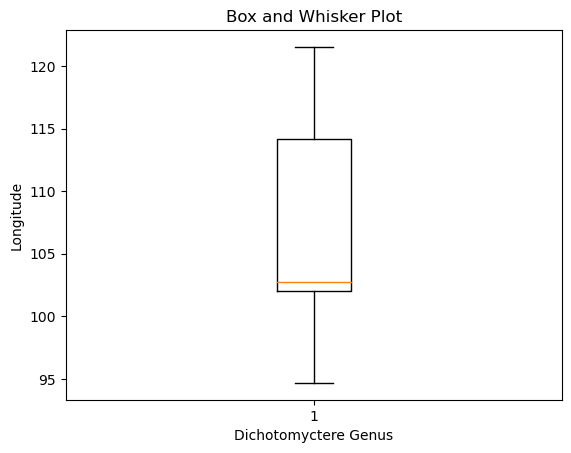

In [53]:
plt.xlabel('Dichotomyctere Genus')
plt.ylabel('Longitude')
plt.title('Box and Whisker Plot')
plt.boxplot(selected_rows)

In [68]:
column_data = df['longitude']



Text(0.5, 1.0, 'Histogram')

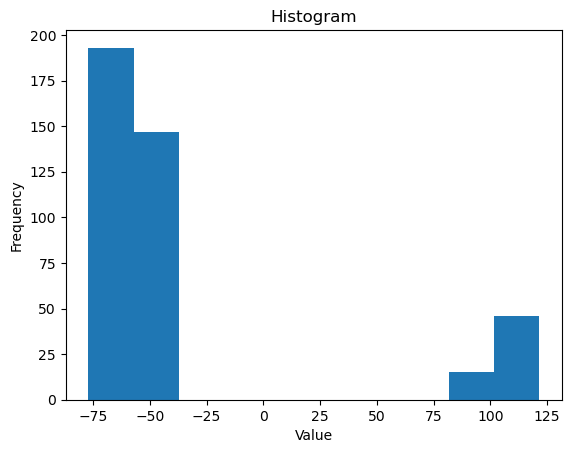

In [69]:
plt.hist(column_data)

plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram')

In [54]:
selected_rowss = df[df['longitude'] <= 0]['longitude']

{'whiskers': [<matplotlib.lines.Line2D at 0x29b10f0cbe0>,
 'caps': [<matplotlib.lines.Line2D at 0x29b10f0d120>,
 'boxes': [<matplotlib.lines.Line2D at 0x29b10f0c940>],
 'medians': [<matplotlib.lines.Line2D at 0x29b10f0d540>],
 'fliers': [<matplotlib.lines.Line2D at 0x29b10f0d7e0>],
 'means': []}

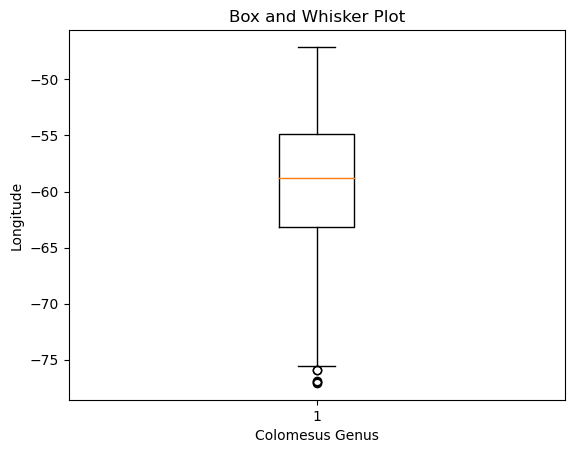

In [55]:
plt.xlabel('Colomesus Genus')
plt.ylabel('Longitude')
plt.title('Box and Whisker Plot')
plt.boxplot(selected_rowss)

In [56]:
column_data = df['longitude']


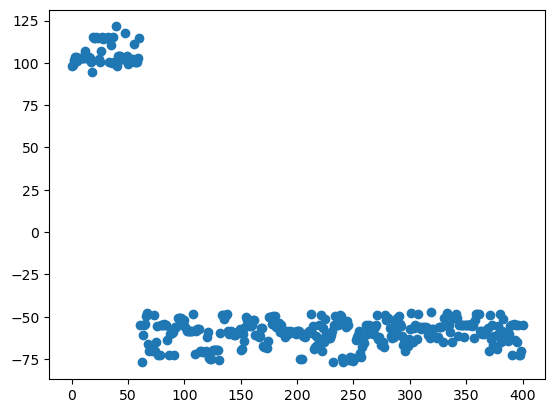

In [57]:
plt.scatter(range(len(column_data)), column_data)


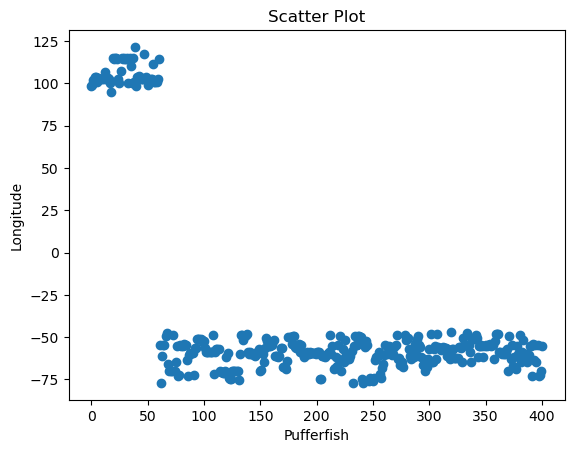

In [59]:
plt.xlabel('Pufferfish')
plt.ylabel('Longitude')
plt.title('Scatter Plot')
plt.scatter(range(len(column_data)), column_data)
plt.show()

In [60]:
from mpl_toolkits.mplot3d import Axes3D


In [61]:
column_data = df['longitude']


In [62]:
indices = range(len(column_data))


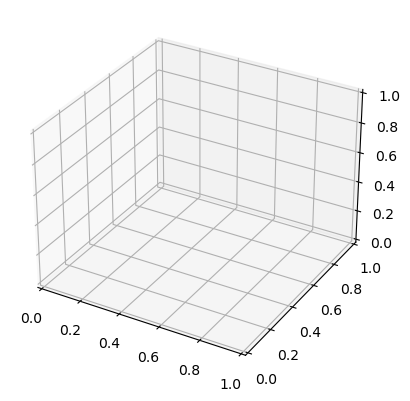

In [63]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

In [64]:
ax.scatter(indices, indices, column_data)


ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')
ax.set_title('3D Scatter Plot')

Text(0.5, 0.92, '3D Scatter Plot')

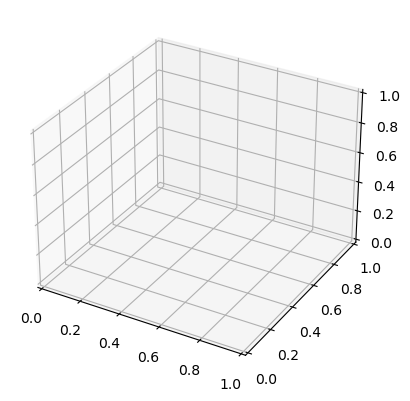

In [65]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

In [67]:
plt.show()